In [1]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bfn1002
working directory set to /home/hbkoziel/awi-models


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition & text size (i.e. 200 or 600)
dpicnt=200
if dpicnt == 600:
    xlablesize   = 12
    ylabelsize   = 12
    titlesize    = 14
    shrinkfactor = 0.9
elif dpicnt == 200:
    xlablesize   = 8
    ylabelsize   = 8
    titlesize    = 10
    shrinkfactor = 0.9 
    
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = True
usepickle = True

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [4]:
# MESH IMPORT MODULE #

# option 1
#mesh = fesom_mesh(meshpath, get3d = get3d)

# option 2
mesh = load_mesh(meshpath, get3d = get3d, usepickle = usepickle)

The *usepickle = True* and the pickle file (*pickle_mesh*) exists.
 We load the mesh from it.


In [5]:
ncfile      = resultpath+runid+'.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalVol3D = f.variables['cluster_vol'][:]
NodalArea2D = f.variables['cluster_area'][:]

Arc_ind3d   = np.nonzero((mesh.y3 >= 65))
Arc_ind2d   = np.nonzero((mesh.y2 >= 65))

In [6]:
year=2000
ncfile = resultpath+runid+'.'+str(year)+'.oce.diag.nc'
f           = Dataset(ncfile, 'r')

In [12]:
#uu         = f.variables['uu'][:,0:mesh.n2d].mean(axis=0)
uu         = f.variables['uu'][:,Arc_ind2d].mean(axis=0)
uu2=uu[Arc_ind2d]
#uu         = np.sum(uu[Arc_ind2d]*NodalArea2D[Arc_ind2d])
data2=uu2

IndexError: Index cannot be multidimensional

In [13]:
mesh.n2d

753179

In [15]:
print uu.shape
print uu2.shape
print uu[Arc_ind2d].shape
print mesh.x2.shape
print mesh.x2[Arc_ind2d].shape
print mesh.elem[Arc_ind2d].shape
elem2=mesh.elem[Arc_ind2d]
print elem2.shape
print data2.shape
print Arc_ind2d.index

(753179,)
(565787,)
(565787,)
(753179,)
(565787,)
(565787, 3)
(565787, 3)
(565787,)
<built-in method index of tuple object at 0x2aaae1d8cdd0>


ftriplot, number of dummy points: 0
(565787,)
(565787,)
(565787,)
(565787, 3)


ValueError: triangles max element is out of bounds

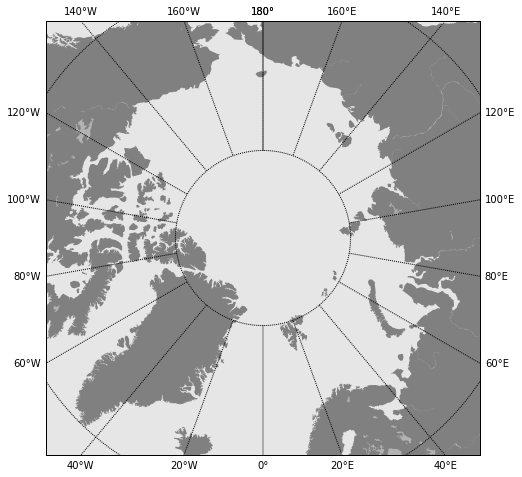

In [11]:
contours = [-2, 2, 0.4]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')

elem2=mesh.elem[Arc_ind2d]

d=data2#.mean(axis=1)



k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2[Arc_ind2d], mesh.y2[Arc_ind2d])
print x.shape
print y.shape
print d.shape
print elem2.shape
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[True,True,True,True]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
label = runid+': Winter surface current velocity trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
plt.title(label,y=1.05)
cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
cbar.set_label(r'Winter surface current velocity trend (mm s$^{-1}$ year$^{-1}$)')

In [ ]:
# initlialyze
Vspeed = np.empty((len(years),mesh.n2d))
#DATE = np.empty((len(years)))

# loop over years
for ind in range(0,len(years)):
     print years[ind]
     ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.diag.nc'
     f      = Dataset(ncfile, 'r')
     #din    = f.variables[var_id][11]
     if years[ind] < 2000:
         uu    = f.variables['uu'][0:3,0:mesh.n2d].mean(axis=0)
         vv    = f.variables['vv'][0:3,0:mesh.n2d].mean(axis=0)
     else:
         uu    = f.variables['uu'][0:45,0:mesh.n2d].mean(axis=0)
         vv    = f.variables['vv'][0:45,0:mesh.n2d].mean(axis=0)
     
     #date    = f.variables['time'][45]
     #nc_attrs, nc_dims, nc_vars = ncdump(nc_file)
     #date   = f.dimensions['T'].size
     Vspeed[ind,:]=sqrt(uu+vv)
     #DATE[ind]=date

In [ ]:
result_fit = np.ma.polyfit(years,Vspeed,1)
data2 = result_fit[0,:]
data2 = data2 * 1000

In [ ]:
contours = [-2, 2, 0.4]
contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
elem2=mesh.elem#[mesh.no_cyclic_elem,:]
d=data2[elem2].mean(axis=1)
k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
elem2=elem2[k,:]
print 'ftriplot, number of dummy points:', len(d)-len(k)		
map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
x, y = map(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[True,True,True,True]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
label = runid+': Winter surface current velocity trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
plt.title(label,y=1.05)
cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
cbar.set_label(r'Winter surface current velocity trend (mm s$^{-1}$ year$^{-1}$)')
    
if export_plot == True:
    plt.savefig(savepath+'CurrentVel_trend_'+str(years[ind])+'.png', dpi = dpicnt, bbox_inches='tight') 
        
plt.show() 